In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy import integrate
from ipywidgets import interactive, fixed
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelado/population.csv")
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Country Name Country Code  Year     Value
0            Aruba          ABW  1960     54608
1            Aruba          ABW  1961     55811
2            Aruba          ABW  1962     56682
3            Aruba          ABW  1963     57475
4            Aruba          ABW  1964     58178
...            ...          ...   ...       ...
16395     Zimbabwe          ZWE  2017  14751101
16396     Zimbabwe          ZWE  2018  15052184
16397     Zimbabwe          ZWE  2019  15354608
16398     Zimbabwe          ZWE  2020  15669666
16399     Zimbabwe          ZWE  2021  15993524

[16400 rows x 4 columns]


In [ ]:
dfaruba=df[df['Country Name']=='Aruba']
dfaruba

,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,54608
1,Aruba,ABW,1961,55811
2,Aruba,ABW,1962,56682
3,Aruba,ABW,1963,57475
4,Aruba,ABW,1964,58178
...,...,...,...,...
57,Aruba,ABW,2017,105439
58,Aruba,ABW,2018,105962
59,Aruba,ABW,2019,106442
60,Aruba,ABW,2020,106585


Quiero plotear la poblacion de algun pais en funcion del tiempo.
Habiamos visto la clase pasada que
P(t) = (P0 * k) / (k * e(rt) + P0(1- e^(-rt)))
P0 es poblacion inicial y k es la poblacion a tiempo infinito que no la sabemos
r nos dice como crece la poblacion por año mas o menos

tenemos que ver distintos r y k. tenemos que usar widgets (deslizadores) para graficar P(t) en funcion de t.

Puedo definirme una funcion tal que elegi el r, agarre mis datos, la curva, la distancia total y la sume. es una funcion que depende de r. (no entendi)

In [ ]:

df3p = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelado/population.csv", usecols=['Country Name','Year', 'Value'])
polonia_data = dp3[dp3['Country Name'] == 'Poland']
#Estoy seleccionadno columnas que me importan#

In [ ]:
dfpolonia=df3p[df3p['Country Name']=='Poland']
dfpolonia
#Quiero analizar solo Polonia#


,Country Name,Year,Value
11718,Poland,1960,29637450
11719,Poland,1961,29964000
11720,Poland,1962,30308500
11721,Poland,1963,30712000
11722,Poland,1964,31139450
...,...,...,...
11775,Poland,2017,37974826
11776,Poland,2018,37974750
11777,Poland,2019,37965475
11778,Poland,2020,37899070


In [ ]:
xp=dfpolonia.iloc[:, 1].values-1960# Le restamos el año inicial para que empieze en 0.
yp=dfpolonia.iloc[:, 2].values
print(xp)
print(yp)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
[29637450 29964000 30308500 30712000 31139450 31444950 31681000 31987155
 32294655 32548300 32664300 32783500 33055650 33357200 33678899 34015199
 34356300 34689050 34965600 35247217 35574150 35898587 36230481 36571808
 36904134 37201885 37456119 37668045 37824487 37961529 38110782 38246193
 38363667 38461408 38542652 38594998 38624370 38649660 38663481 38660271
 38258629 38248076 38230364 38204570 38182222 38165445 38141267 38120560
 38125759 38151603 38042794 38063255 38063164 38040196 38011735 37986412
 37970087 37974826 37974750 37965475 37899070 37747124]


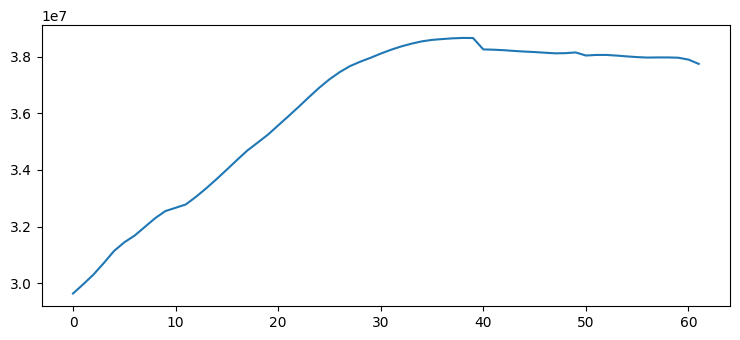

In [ ]:
plt.plot(xp,yp)

In [ ]:
%pip install -q ipywidgets

In [ ]:
# @title Texto de título predeterminado
def ploteando(l=30, k=0):
  w=dfpolonia.iloc[:, 1].values-1960
  z=dfpolonia.iloc[:, 2].values
  plt.plot(w, z)
  plt.plot(w, p0*k/(k*np.exp(-w/l)+p0*(1-np.exp(-w/l))))
  plt.show()
  print(np.sum((z-(p0*k/(k*np.exp(-w/l)+p0*(1-np.exp(-w/l)))))**2))
  #Quiero que me imprima una especie de error cuadrático

In [ ]:
p0=29637450
#Dejo como parámetros la taza de crecimiento y la población final
p= interactive(ploteando, l=(10, 100), k=(37000000, 40000000))
display(p)

interactive(children=(IntSlider(value=30, description='l', min=10), IntSlider(value=37000000, description='k',…

grafico el error

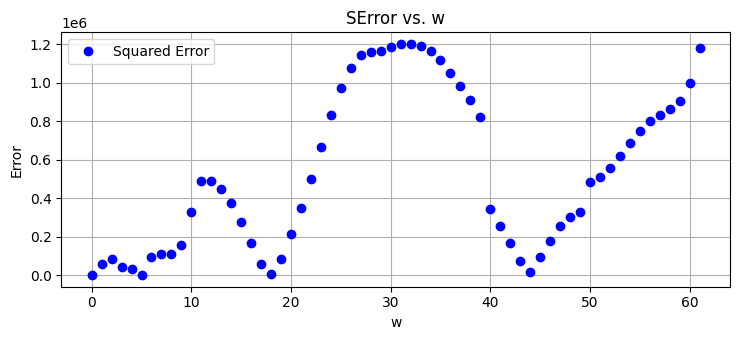

In [ ]:
w=dfpolonia.iloc[:, 1].values-1960
z=dfpolonia.iloc[:, 2].values
l=19
k=39445564
error=[]
predicted_z = (p0 * k) / (k * np.exp(-w / l) + p0 * (1 - np.exp(-w / l)))

# Calculate squared error
error = np.sqrt((z - predicted_z) ** 2)

# Plot squared error against w
plt.plot(w, error, 'bo', label='Squared Error')
plt.xlabel('w')
plt.ylabel('Error')
plt.title('SError vs. w')
plt.legend()
plt.grid(True)
plt.show()

grafico el error (eje y) para cada l (eje x)

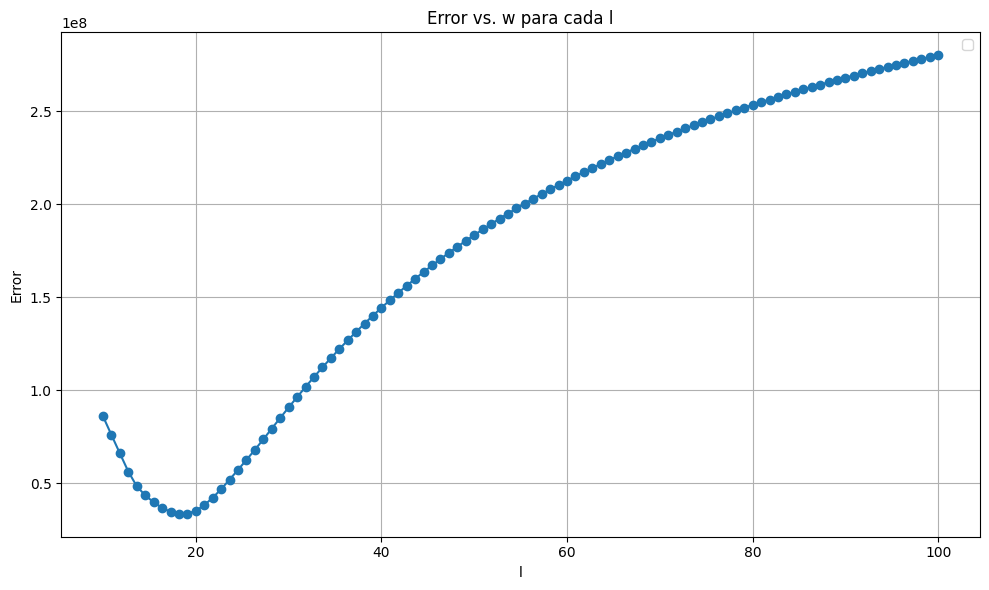

In [ ]:
w=dfpolonia.iloc[:, 1].values-1960
z=dfpolonia.iloc[:, 2].values

l_values = np.linspace(10, 100, 100)
k=39445564
errors = []

# Loop through each value of l
for l in l_values:
    # Calculate the predicted values using the equation
    prediction_z = p0 * k / (k * np.exp(-w / l) + p0 * (1 - np.exp(-w / l)))

    # Calculate  error
    error = np.sum(np.sqrt((z - prediction_z) ** 2))

    # Append error for this l value to the list
    errors.append(error)

# Plot error against w for each value of l
plt.figure(figsize=(10, 6))
plt.plot(l_values, errors, marker='o', linestyle='-')

plt.xlabel('l')
plt.ylabel('Error')
plt.title('Error vs. w para cada l')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.shape

(16400, 4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df.isna().sum()
#Es para ver si hay data corrompida#

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [ ]:
df.dtypes

Country Name    object
Country Code    object
Year             int64
Value            int64
dtype: object

In [ ]:
df.iloc[:, 1:3]

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Modelado/population.csv', usecols=['Country Name','Year', 'Value'])
df3
#Estoy seleccionadno columnas que me importan#

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelado/population.csv", usecols=['Country Name','Year', 'Value'])
dfarubas=df3[df3['Country Name']=='Aruba']
dfarubas
#Quiero analizar solo Arubas#

In [ ]:
x=dfarubas.iloc[:, 1].values-1960# Le restamos el año inicial para que empieze en 0.
y=dfarubas.iloc[:, 2].values
print(x)
print(y)


In [ ]:
plt.plot(x,y)tiene

In [ ]:
%pip install -q ipywidgets

In [ ]:
from scipy import integrate

from ipywidgets import interactive, fixed

In [ ]:
# @title Texto de título predeterminado
def ploteando(l=30, k=0):
  w=dfarubas.iloc[:, 1].values-1960
  z=dfarubas.iloc[:, 2].values
  plt.plot(w, z)
  plt.plot(w, p0*k/(k*np.exp(-w/l)+p0*(1-np.exp(-w/l))))
  plt.show()
  print(np.sum((z-(p0*k/(k*np.exp(-w/l)+p0*(1-np.exp(-w/l)))))**2))
  #Quiero que me imprima una especie de error cuadrático


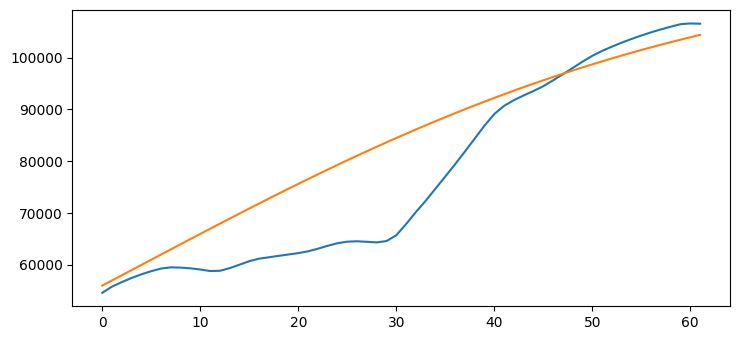

5428934807.106438


In [ ]:
p0=56000
#Dejo como parámetros la taza de crecimiento y la población final
p= interactive(ploteando, l=(10, 100), k=(120000, 190000))
display(p)

In [ ]:
# @title Texto de título predeterminado
def ploteando2(l=10):
  w=dfarubas.iloc[:, 1].values-1960
  z=dfarubas.iloc[:, 2].values
  plt.plot(w, np.sqrt((z-(p0*k/(k*np.exp(-w/l)+p0*(1-np.exp(-w/l)))))**2))
  plt.show()
  g=np.sum(np.sqrt((z-(p0*k/(k*np.exp(-w/l)+p0*(1-np.exp(-w/l)))))**2))
  print(int(g))


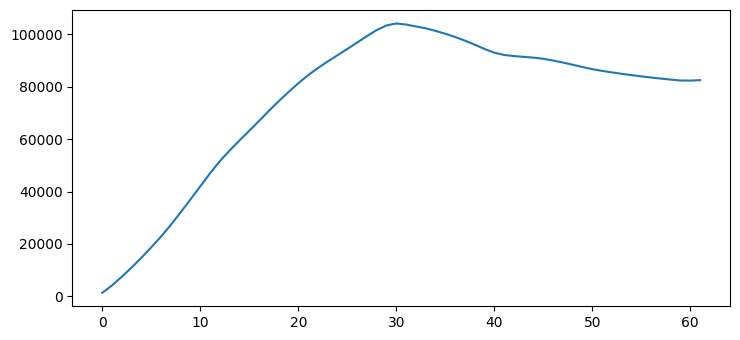

4627870


In [ ]:
k=190000

q= interactive(ploteando2, l=(10,1000))
display(q)

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(x):
  w=dfarubas.iloc[:, 1].values-1960
  z=dfarubas.iloc[:, 2].values
  return(np.sum(np.sqrt((z-(p0*k/(k*np.exp(-w/x)+p0*(1-np.exp(-w/x)))))**2)))





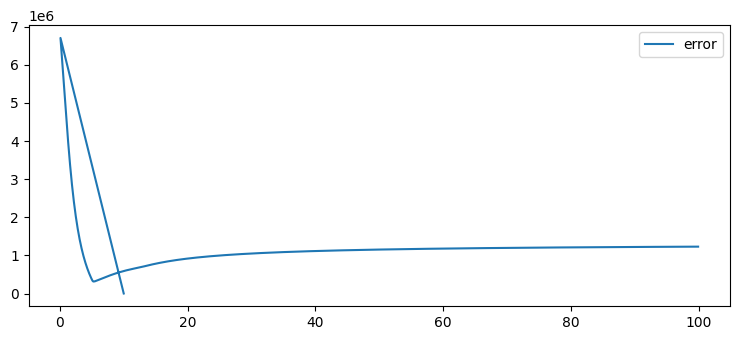

In [ ]:
x_max = 100.0

no_of_iterations=1000

dt = x_max/no_of_iterations



x = np.zeros(no_of_iterations)
y = np.zeros(no_of_iterations)




x[0] = 10
y[0] = 0


for i in range(1,no_of_iterations):
    x[i] = dt * i
    y[i] = f(i)

plt.plot(x, y, label="error")
plt.legend()